# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

In [2]:
%pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\spenc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'distutils'

## **Loading the data**

In [2]:
# loading data into a pandas dataframe
data = pd.read_csv("/Users/spenc/Programming/DS/Unsupervised Learning CS/marketing_campaign.csv", sep="\t")

In [3]:
df = data.copy()

In [14]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the age of the customer
df['Age'] = current_year - df['Year_Birth']

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [15]:
# Write your code here.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.shape

(2240, 29)

##### **Observations:**

Most of the columns are numerical and three are categorical.

There are three object type variables: Date when customer enrolled, Education and Marital status. 
One float type variable that represents the income. 
The rest are of type integer.

Income has 2,216 non-null entries meaning there are 24 missing values. All other columns have complete data.



#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [60]:
# Write your code here
df.describe(include='all').T

count          mean           std     min      25%  \
Income               2216.0  52247.251354  25173.076661  1730.0  35303.0   
Kidhome              2216.0      0.441787      0.536896     0.0      0.0   
Teenhome             2216.0      0.505415      0.544181     0.0      0.0   
Recency              2216.0     49.012635     28.948352     0.0     24.0   
MntWines             2216.0    305.091606    337.327920     0.0     24.0   
MntFruits            2216.0     26.356047     39.793917     0.0      2.0   
MntMeatProducts      2216.0    166.995939    224.283273     0.0     16.0   
MntFishProducts      2216.0     37.637635     54.752082     0.0      3.0   
MntSweetProducts     2216.0     27.028881     41.072046     0.0      1.0   
MntGoldProds         2216.0     43.965253     51.815414     0.0      9.0   
NumDealsPurchases    2216.0      2.323556      1.923716     0.0      1.0   
NumWebPurchases      2216.0      4.085289      2.740951     0.0      2.0   
NumCatalogPurchases  2216.0      2.671029      2.926734     0.0      0.0   
NumStorePurchases    2216.0      5.800993      3.250785     0.0      3.0   
NumWebVisitsMonth    2216.0      5.319043      2.425359     0.0      3.0   
Complain             2216.0      0.009477      0.096907     0.0      0.0   
Response             2216.0      0.150271      0.357417     0.0      0.0   
Age                  2216.0     56.179603     11.985554    29.0     48.0   

                         50%       75%       max  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               174.5    505.00    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         68.0    232.25    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     262.0  
MntGoldProds            24.5     56.00     321.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
Complain                 0.0      0.00       1.0  
Response                 0.0      0.00       1.0  
Age                     55.0     66.00     132.0

In [8]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

##### **Observations:**

The average house hold income is $52247.25

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [9]:
# Write your code here
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [19]:
missing_income = df['Income'].isna().sum()
print(missing_income)

24


In [20]:
print(df[df['Income'].isna()])

      Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
10       NaN        1         0       11         5          5   
27       NaN        1         0       19         5          1   
43       NaN        0         0       80        81         11   
48       NaN        2         1       96        48          5   
58       NaN        1         0       57        11          3   
71       NaN        1         0       25        25          3   
90       NaN        2         1        4       230         42   
91       NaN        1         1       45         7          0   
92       NaN        0         0       87       445         37   
128      NaN        0         1       23       352          0   
133      NaN        0         1       96       231         65   
312      NaN        0         0       69       861        138   
319      NaN        1         2       67       738         20   
1379     NaN        0         1       39       187          5   
1382     NaN        1    

In [21]:
df.dropna(subset=['Income'], inplace=True)

##### **Observations:**

There are 24 missing values in the income column.
I dropped these data points as dropping 24 points out of 2,240 records will have a very small impact on the overall analysis.  

#### **Question 4**: Are there any duplicates in the data?

In [10]:
# Write your code here
df.duplicated().sum()

np.int64(0)

##### **Observations:**

There are no duplicates in the data.

In [16]:
columns_to_drop = ['Dt_Customer','Year_Birth','ID','AcceptedCmp1', 'Z_CostContact', 'Z_Revenue', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Education', 'Marital_Status']
df.drop(columns=columns_to_drop, inplace=True)

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [22]:
# Write your code here
df.shape

(2216, 18)

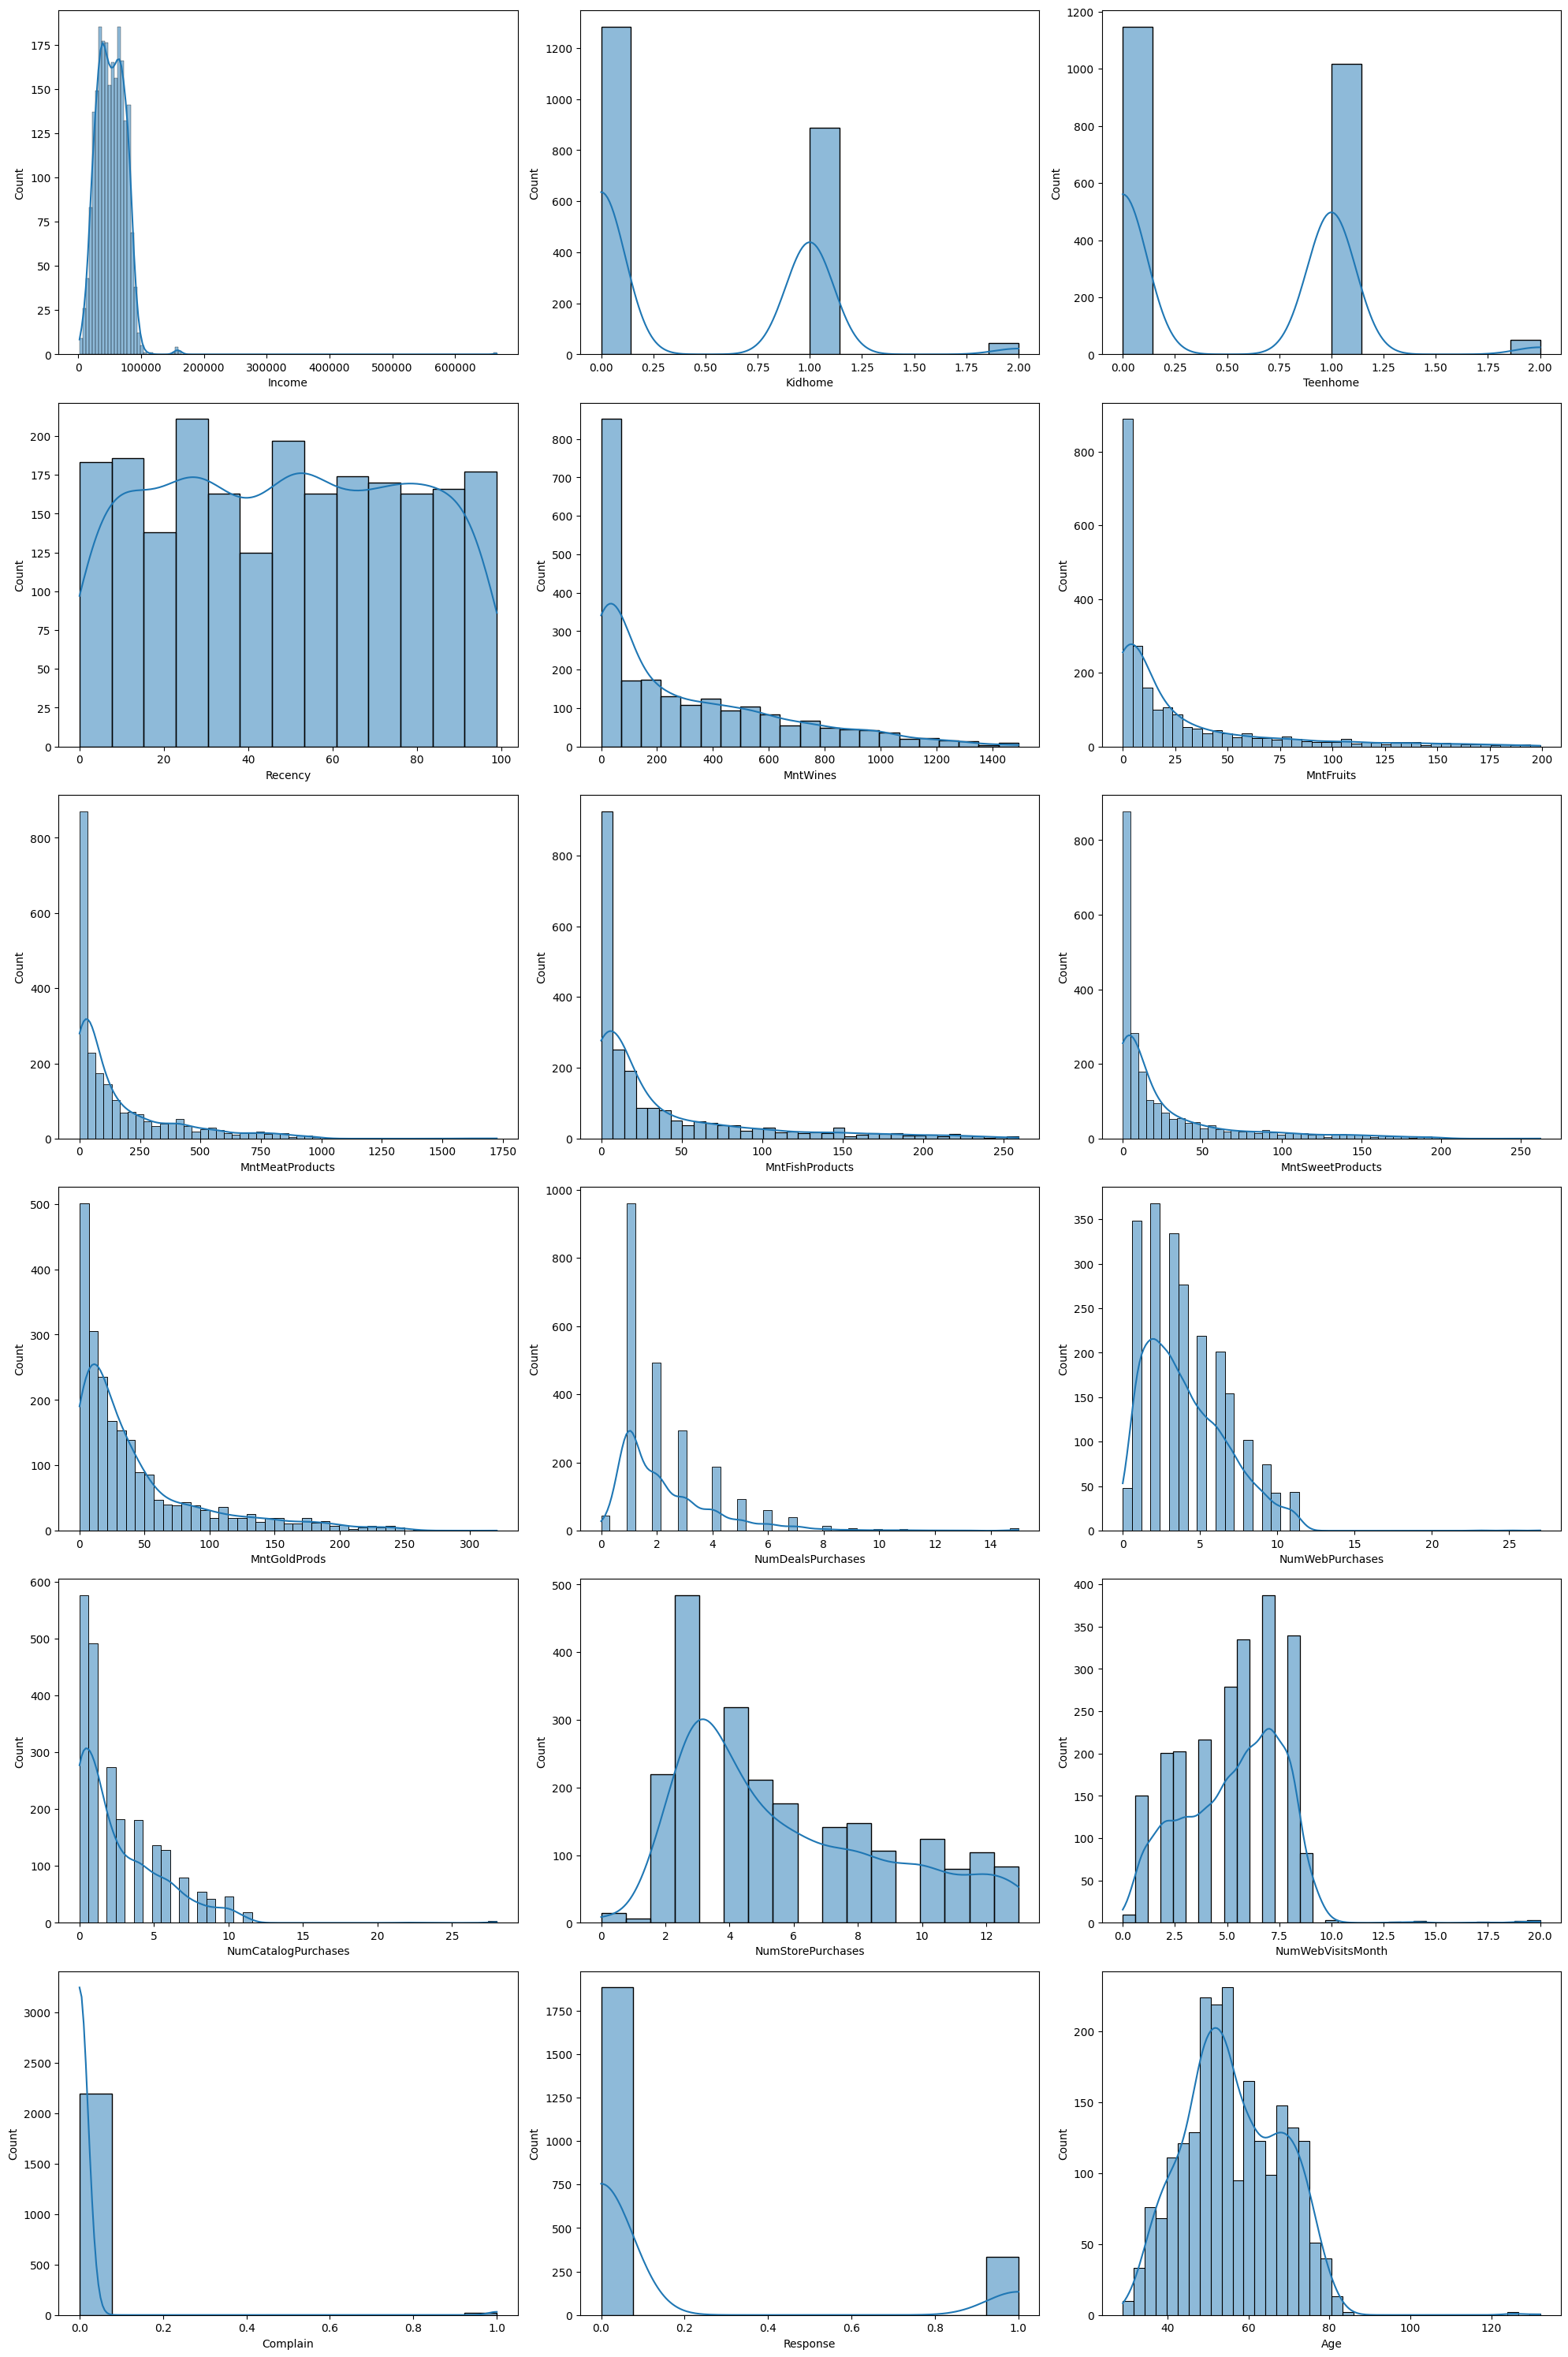

In [30]:
plt.figure(figsize=(20, 30))

for i, feature in enumerate(df.columns): #iterating through each column
    plt.subplot(6, 3, i+1)                  # assign a subplot in the main plot
    sns.histplot(data=df, x=feature, kde = True)    # plot the histogram

plt.tight_layout();

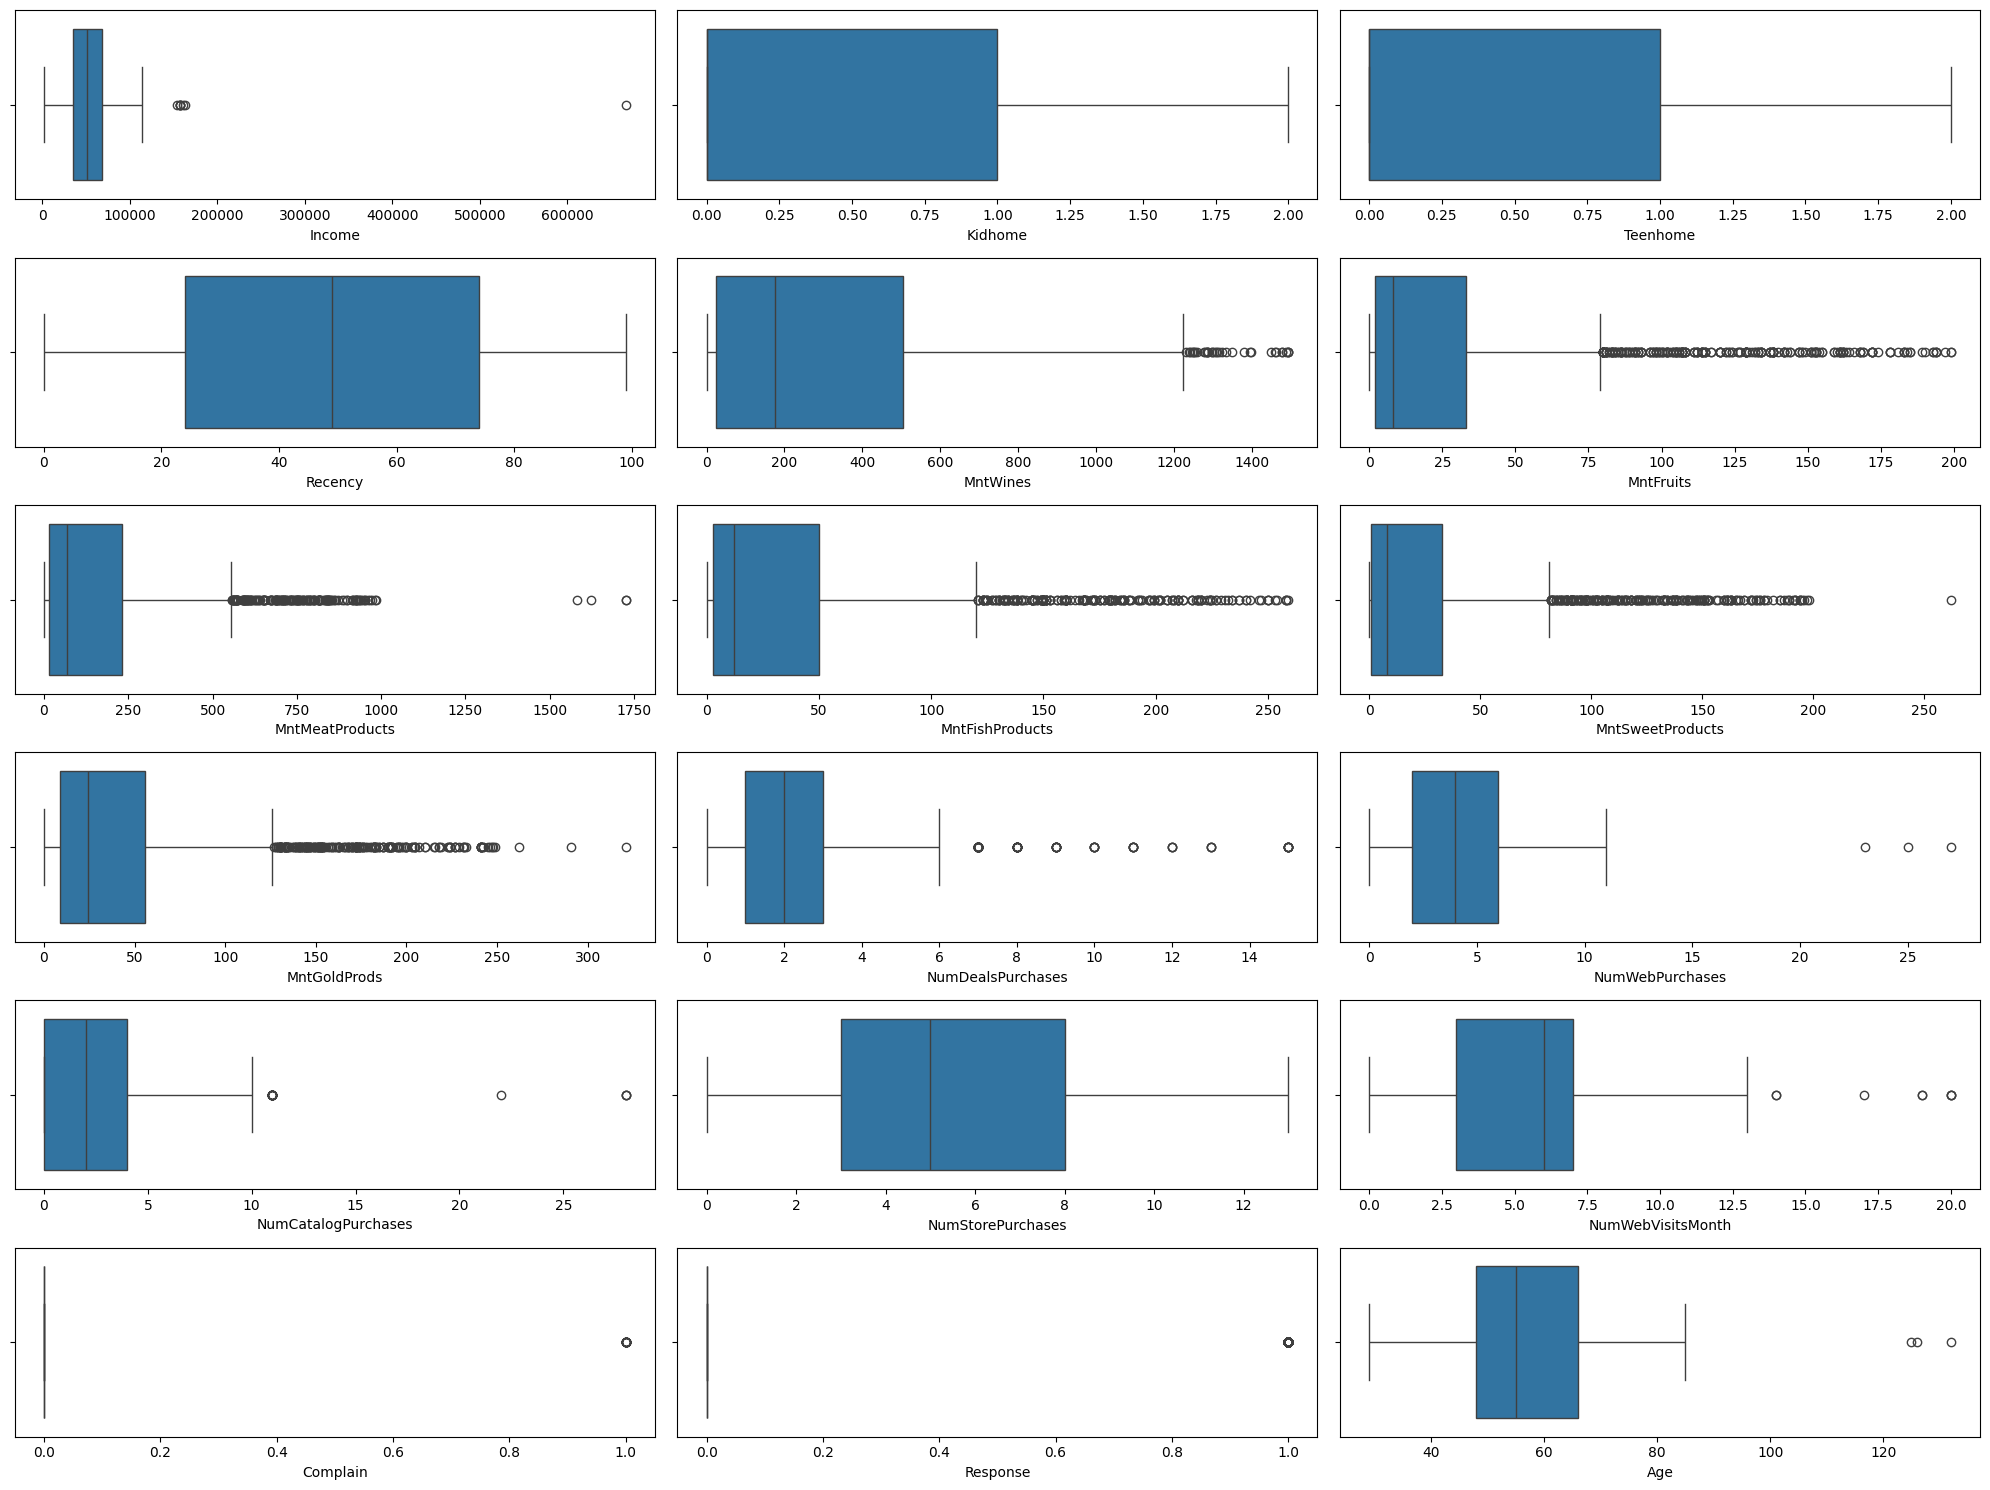

In [27]:
plt.figure(figsize=(20, 15))

# plotting the boxplot for each numerical feature
for i, feature in enumerate(df.columns):    # iterating through each column
    plt.subplot(6, 3, i+1)                     # assign a subplot in the main plot
    sns.boxplot(data= df, x= feature)    # plot the boxplot

plt.tight_layout();

##### **Observations:**

Income: Majority of customers fall into lower to moderate income brackets, very rightly skewed. There are a couple of high income families present in the data but I don't want to truncate since they could be legitimate customers to the business.

Kidhome and Teenhome: Observing that most customers have either no kids or one kid, with a few having 2 kids. This could potentially signify distinct segments of classes as having kids versus not having kids can influence spending behavior.

Recency: There is a wide range of purchase recency. Some have purchased very recently while others have not purchased in a while. High recency customers are more probable to respond to the marketing campaigns where as low recency customers could be targeted for a recapturing campaign.

Product Spending: All of the products are showing right skewness. A large amount of customers spend very little on each product where as a small amount spends a lot. There exists many outliers in these product categories which would signify large bulk buys or VIP customers as we mentioned earlier in the income section.

Visits/Purchasing: Analysis of this shows the potential for different segments of customers favoring different purchasing channels. 

Age: The age of the customers is typically centered around 40 to 50 years of age.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

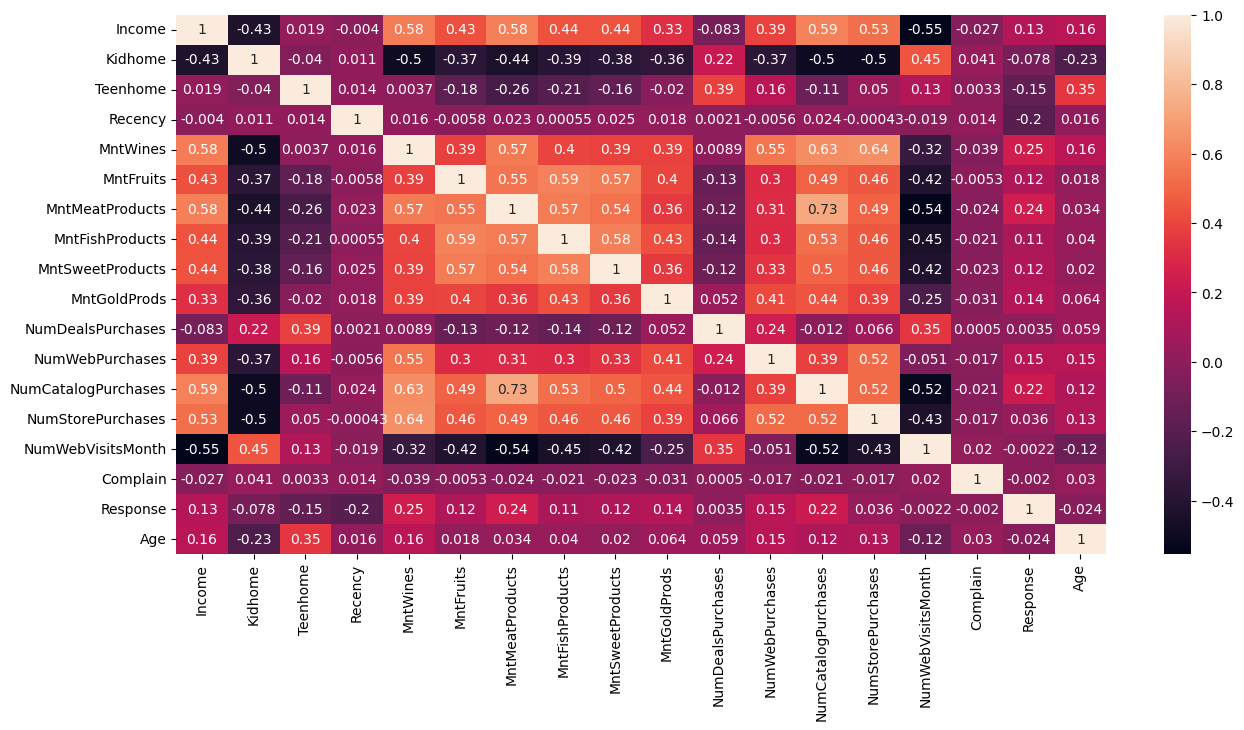

In [31]:
# Write your code here
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

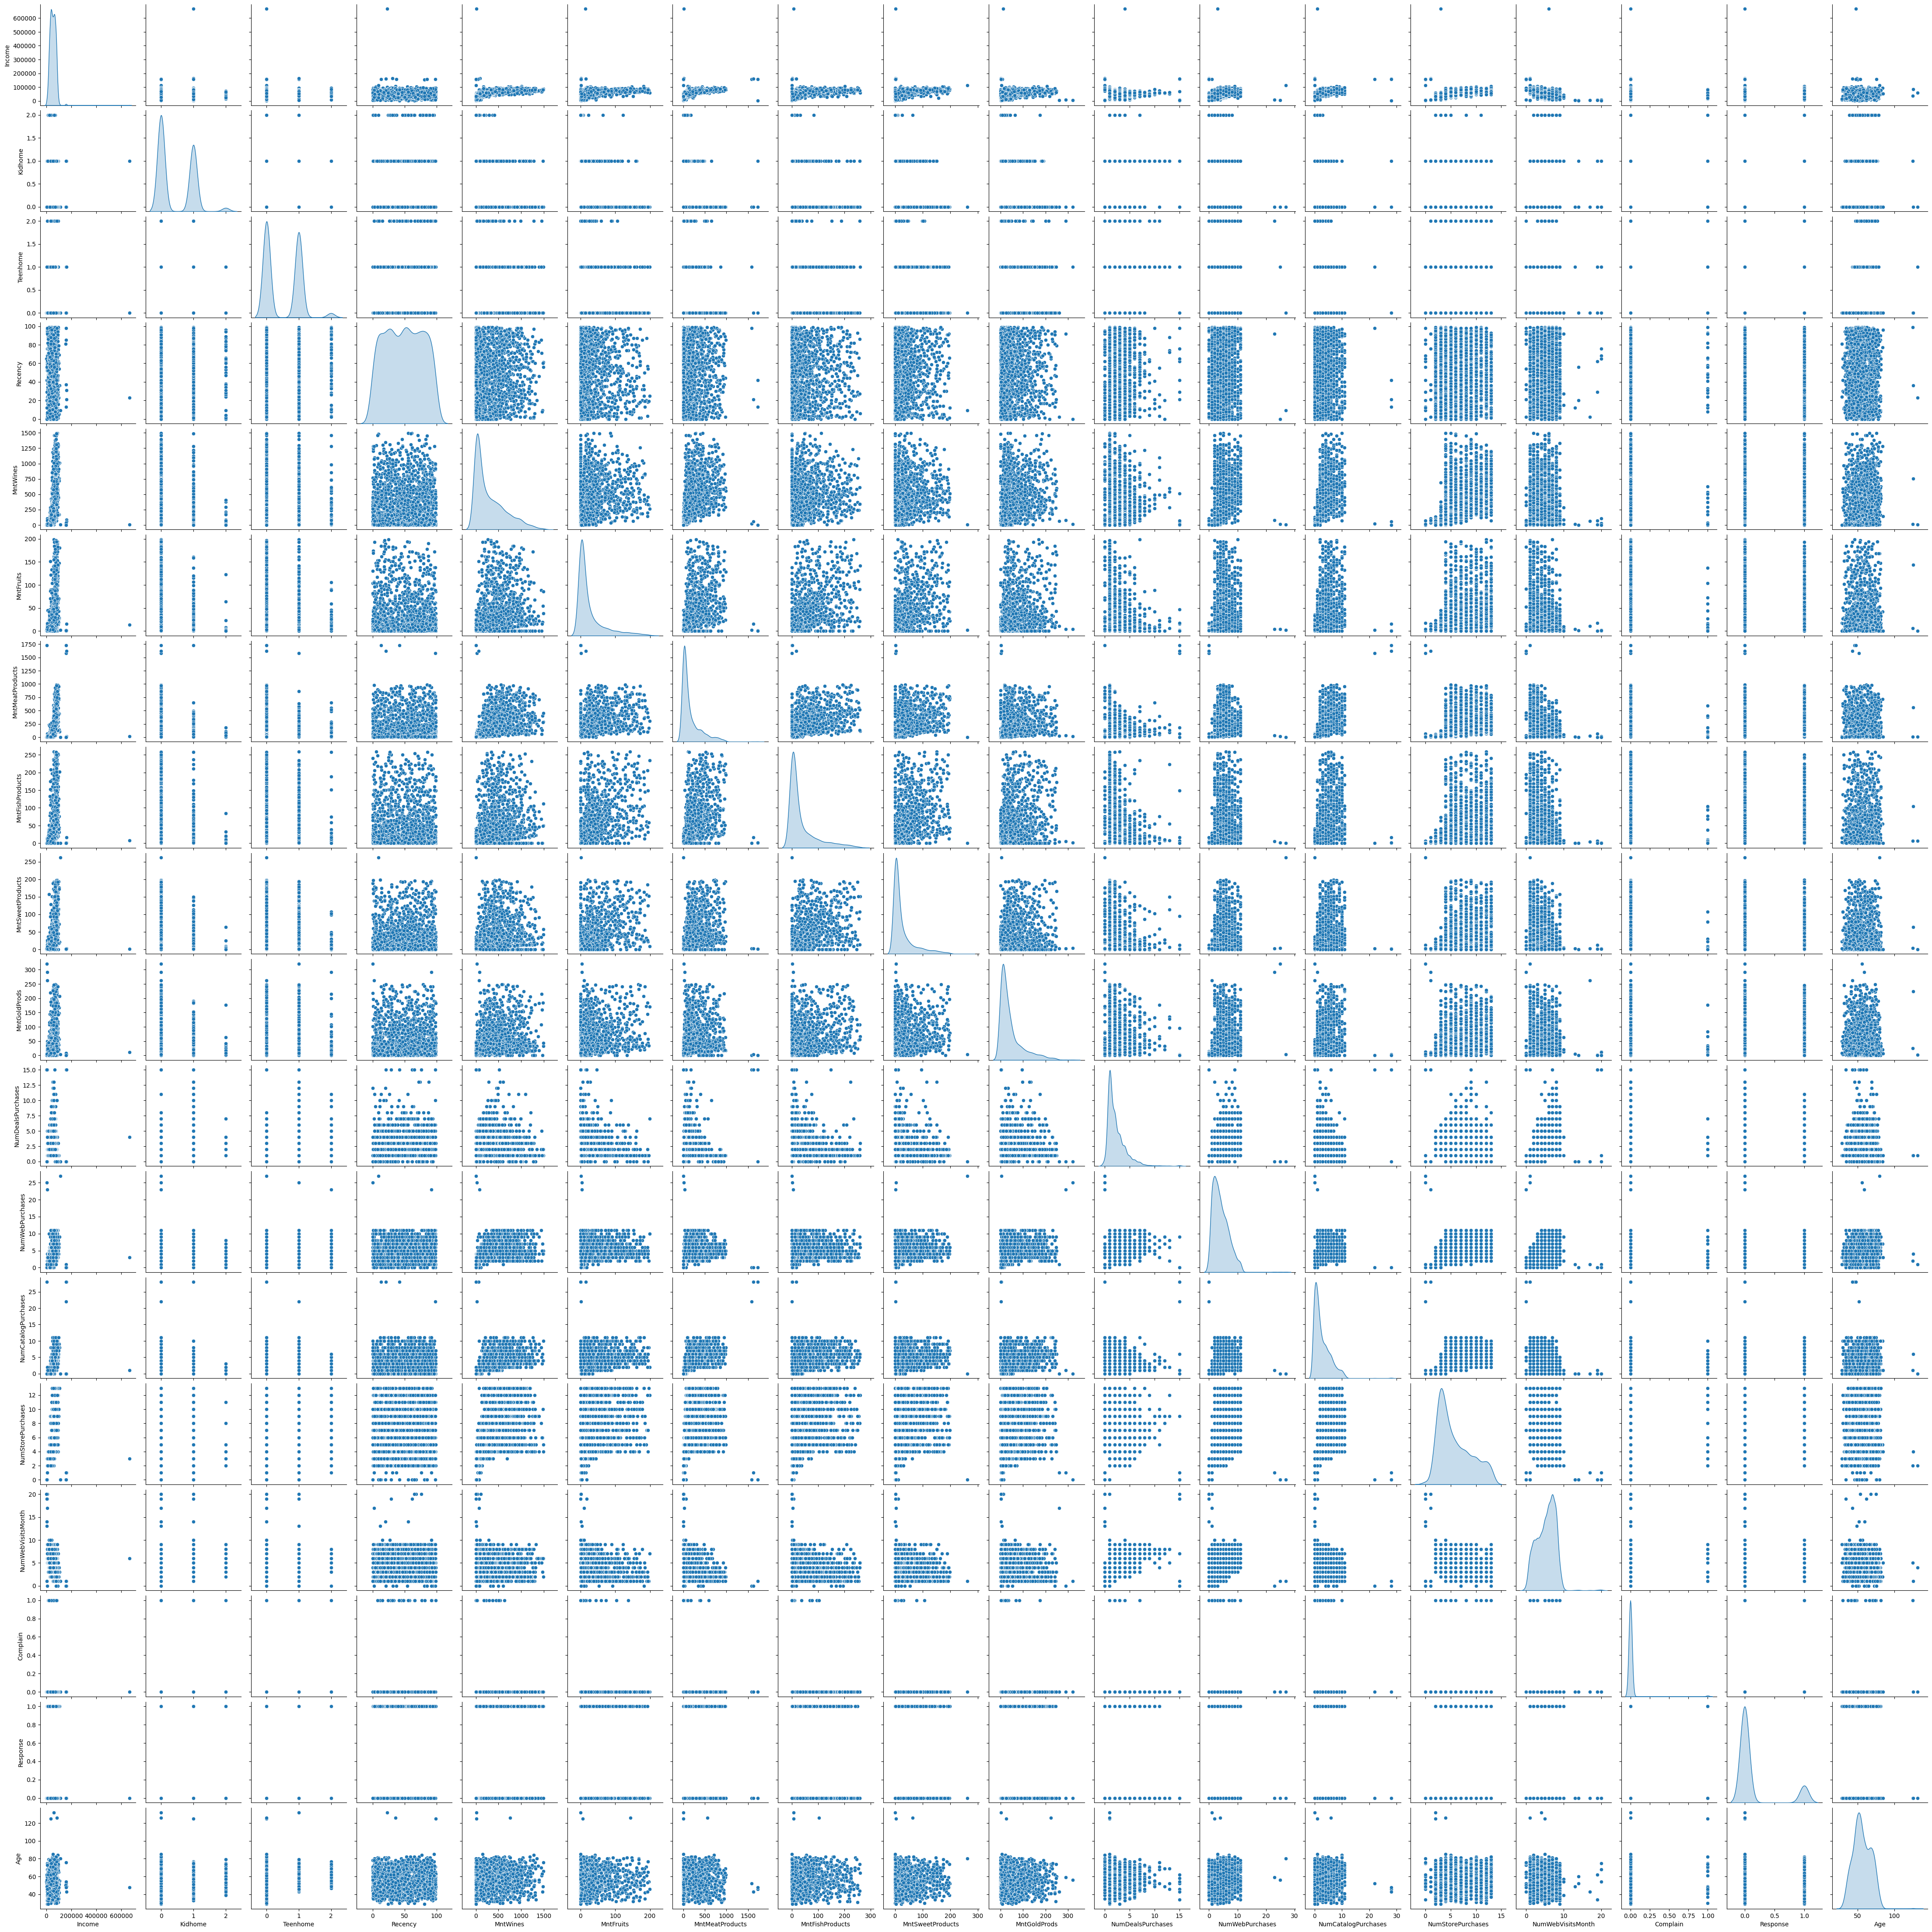

In [33]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

##### **Observations:**

There is a moderately strong corelation between catalogue purchases and the amount of meat products purchased. There is also a moderately strong correlation between in store and wine purchases. There's not much correlation between age and income which is strange as i assumed there would be but that could just prove that there may be an underlying non linear relationship between the two or other factors influencing this correlation. 

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [34]:
scaler = StandardScaler()
subset = df.copy()
subset_scaled = scaler.fit_transform(subset)

In [35]:
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

In [36]:
k_means_data = subset_scaled_data.copy()

Number of Clusters: 2 	WCSS: 29127.696038353864
Number of Clusters: 3 	WCSS: 25873.7932776529
Number of Clusters: 4 	WCSS: 23749.543985464057
Number of Clusters: 5 	WCSS: 22862.09893481863
Number of Clusters: 6 	WCSS: 21681.7718313111
Number of Clusters: 7 	WCSS: 20746.05619222393
Number of Clusters: 8 	WCSS: 19996.857407972268
Number of Clusters: 9 	WCSS: 19239.066336632182
Number of Clusters: 10 	WCSS: 18489.21110994893


C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\3807507581.py:12: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bx-" (-> marker='x'). The keyword argument will take precedence.
  plt.plot(clusters, wcss_k8, "bx-", marker='o')


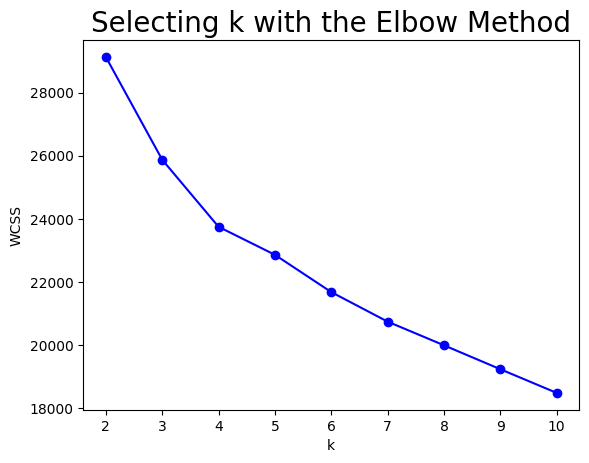

In [38]:
clusters = range(2, 11)
wcss_k8 = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1) # initialize the kmeans model
    model.fit(k_means_data) # fit the kmeans model on the scaled data.
    wcss = model.inertia_
    wcss_k8.append(wcss)

    print("Number of Clusters:", k, "\tWCSS:",wcss)

plt.plot(clusters, wcss_k8, "bx-", marker='o')
plt.xlabel("k")
plt.ylabel("WCSS")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

##### **Observations:**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

In [39]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)       # initialize the kmeans model with the number o clusters.
    preds = clusterer.fit_predict((k_means_data))                  # Fit the kmeans model
    score = silhouette_score(k_means_data, preds)             # Check the silhoutte score against the predictions
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.2834190104351658)
For n_clusters = 3, the silhouette score is 0.2129167052195378)
For n_clusters = 4, the silhouette score is 0.22269429407362273)
For n_clusters = 5, the silhouette score is 0.19161371603674757)
For n_clusters = 6, the silhouette score is 0.1960283965901534)
For n_clusters = 7, the silhouette score is 0.139485554284361)
For n_clusters = 8, the silhouette score is 0.13726282355581582)
For n_clusters = 9, the silhouette score is 0.13940716468701175)


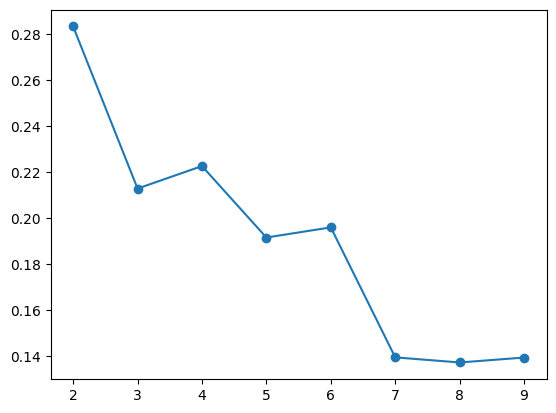

In [40]:
plt.plot(cluster_list, sil_score, marker = 'o')
plt.show()

##### **Observations:**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [65]:
%%time
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(k_means_data)

CPU times: total: 93.8 ms
Wall time: 29 ms


KMeans(n_clusters=4, random_state=0)

In [67]:
# creating a copy of the original data
data1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_data["K_means_segments"] = kmeans.labels_
data1["K_means_segments"] = kmeans.labels_

##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\529758680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral') # Hint: X = clusters, Y = columns.
C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\529758680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral') # Hint: X = clusters, Y = columns.
C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\529758680.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d

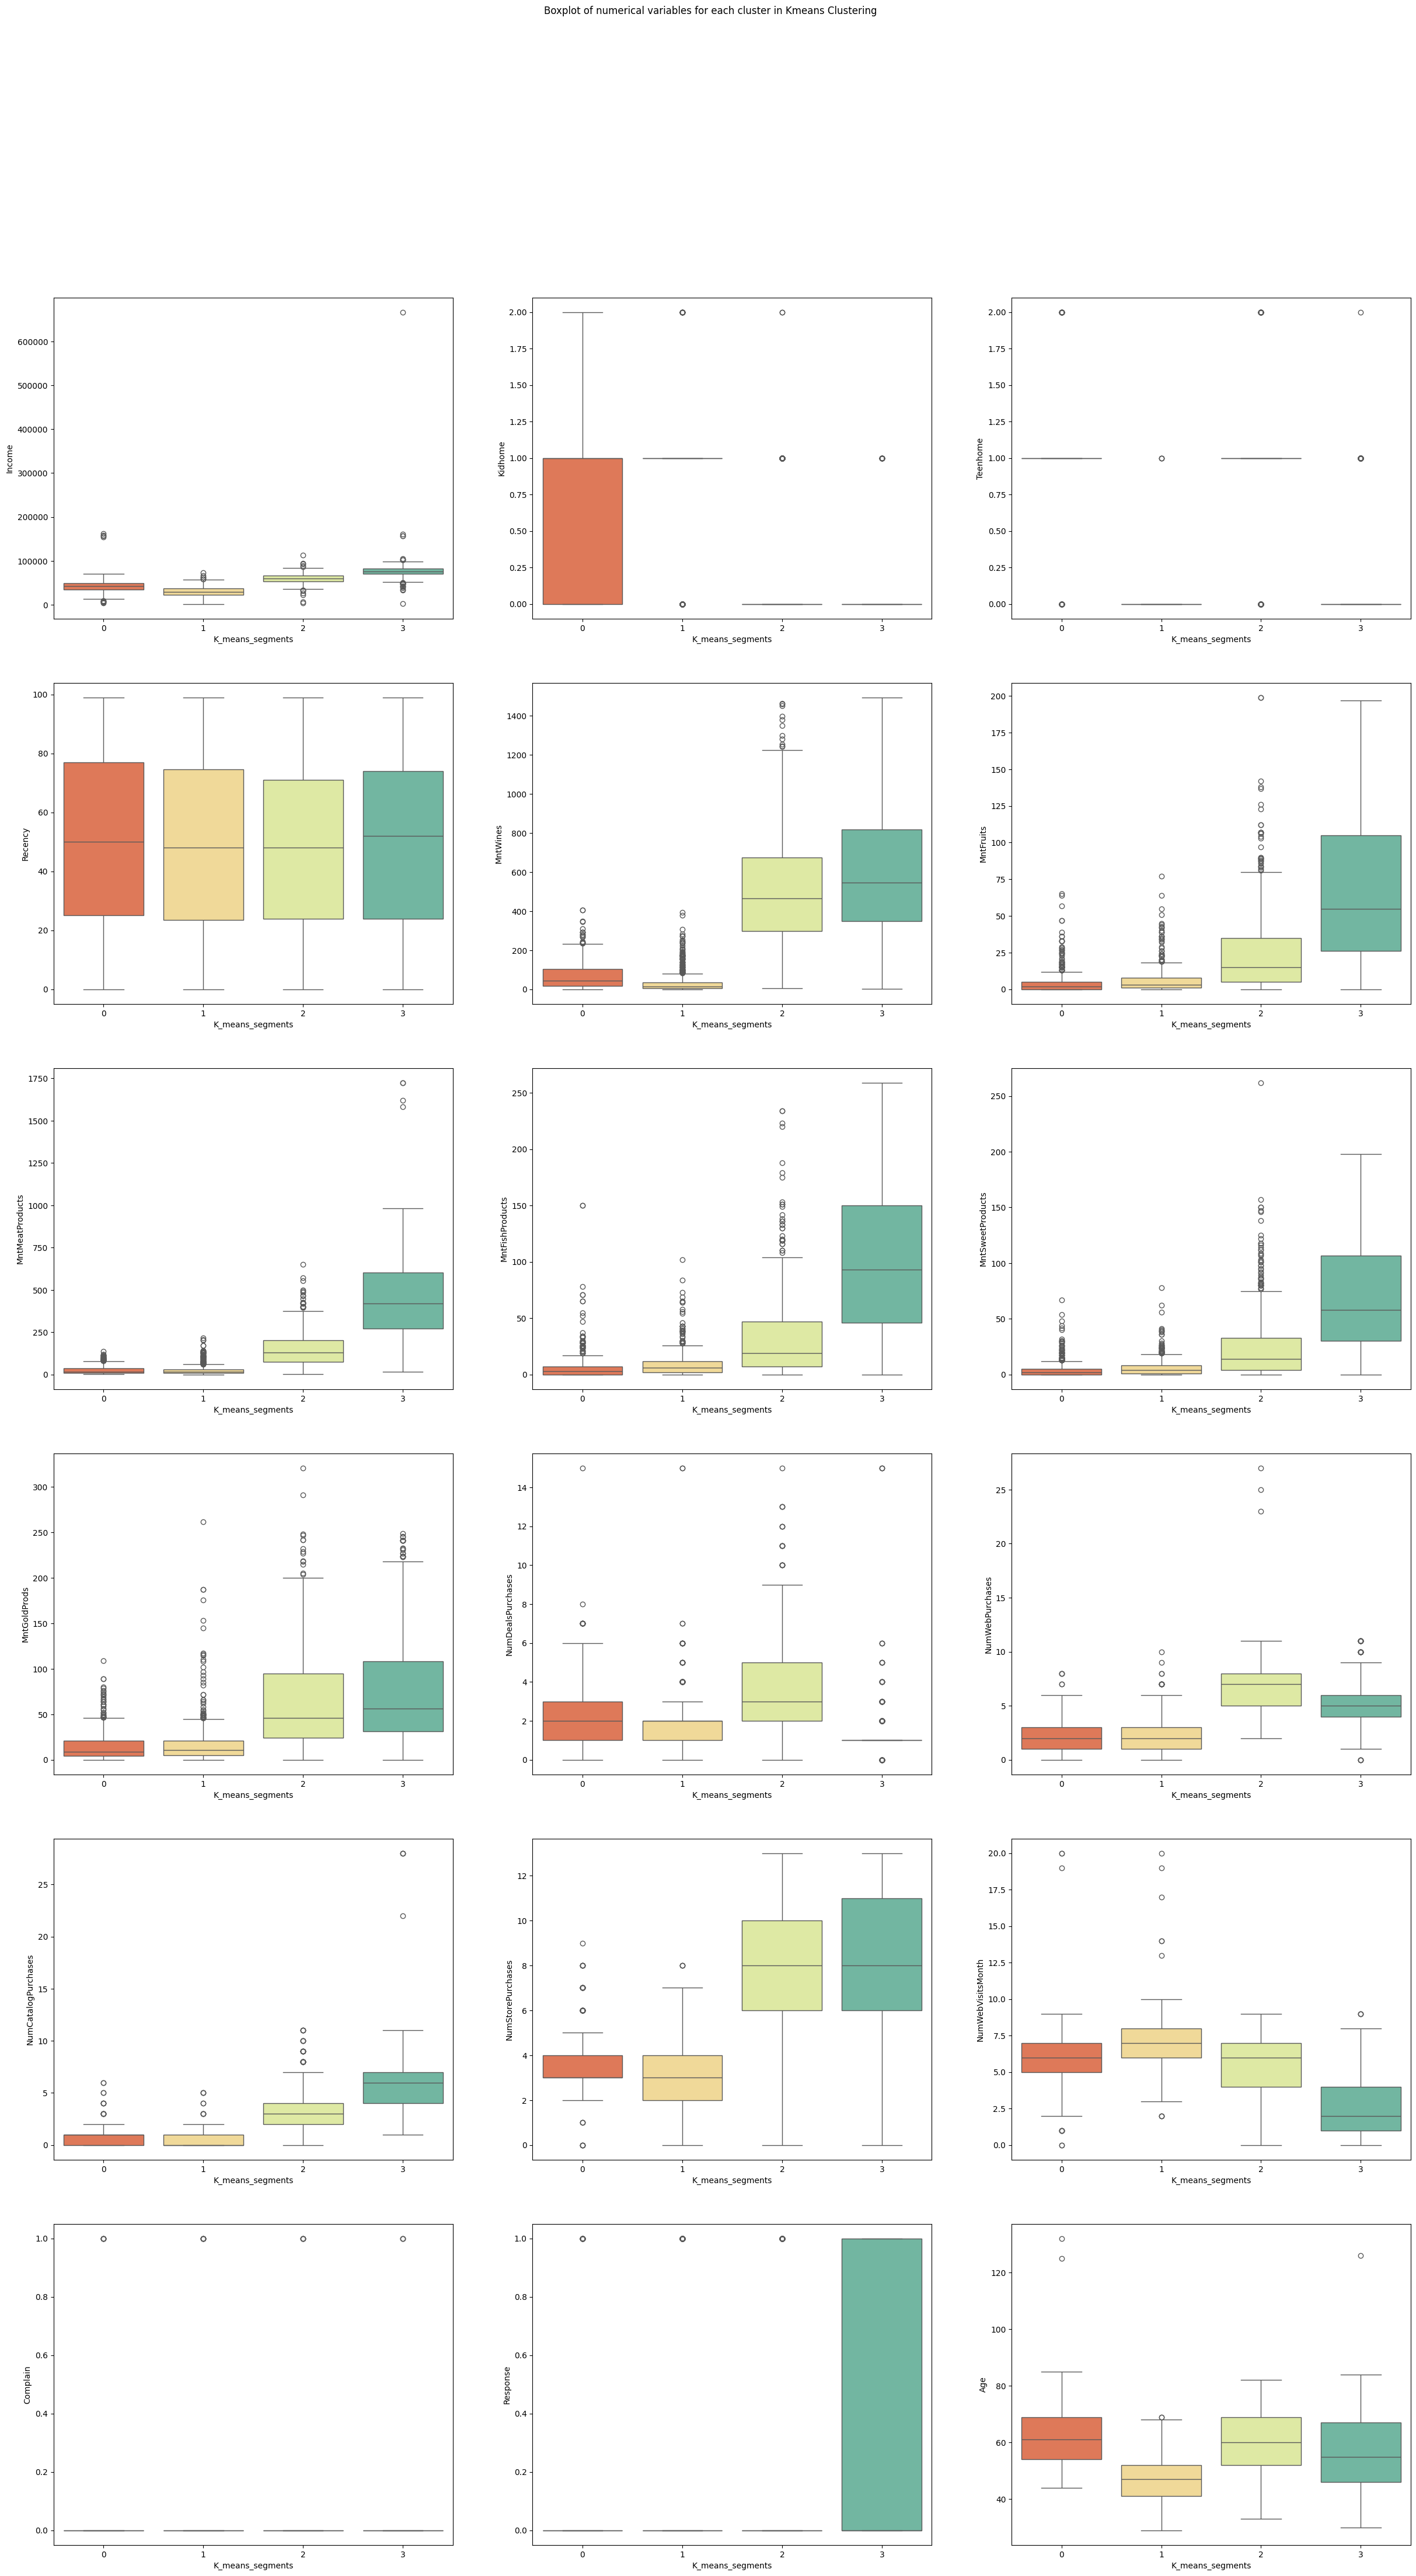

In [68]:
plt.figure(figsize=(30, 50))  # Set the figure size for the plot
plt.suptitle("Boxplot of numerical variables for each cluster in Kmeans Clustering")  # Set the main title for the plot

# Iterate over each numerical variable in the dataframe
for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)  # Create subplots in a 3x4 grid, starting from index 1
    sns.boxplot(data=data1, x="K_means_segments", y=variable, palette='Spectral') # Hint: X = clusters, Y = columns.

##### **Observations:**

#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\686918011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x="K_means_segments", y=variable, palette='Spectral', errorbar=None)
C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\686918011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x="K_means_segments", y=variable, palette='Spectral', errorbar=None)
C:\Users\spenc\AppData\Local\Temp\ipykernel_421172\686918011.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data1, x="K_means_segments", y=variable, 

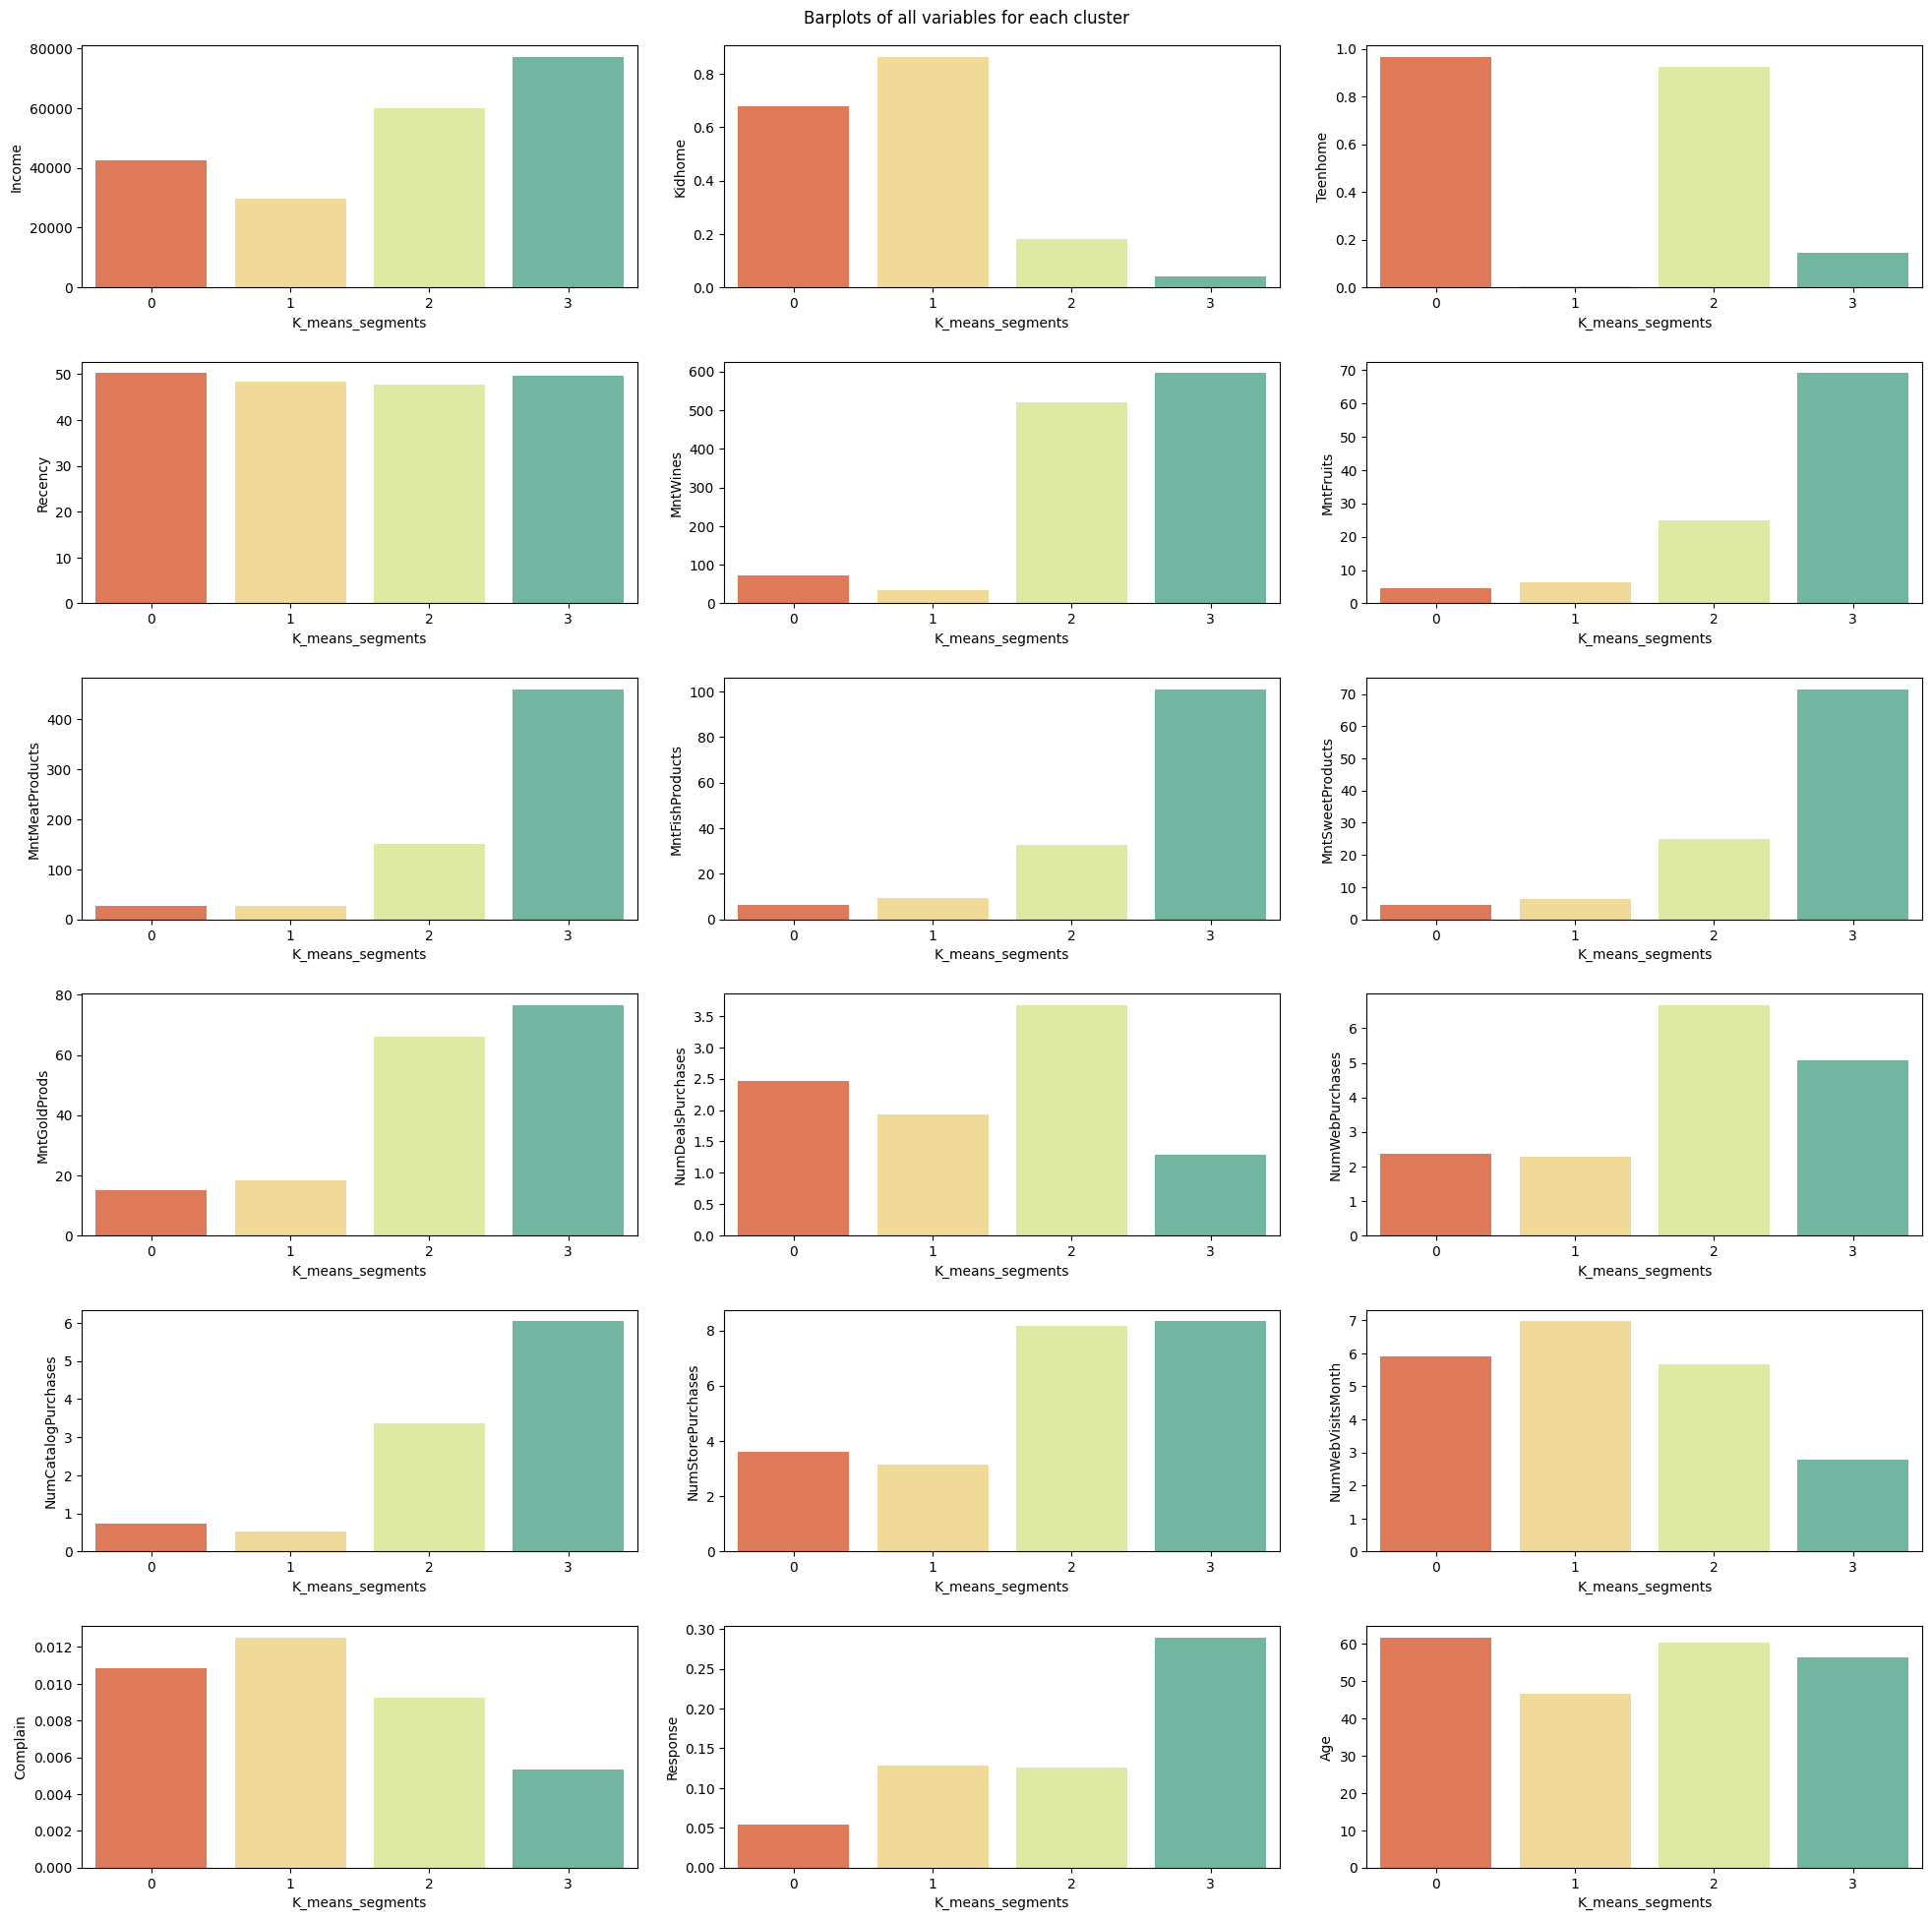

In [69]:
# Prepare for plotting barplots of numerical variables for each cluster
plt.figure(figsize=(20, 20))  # Set the figure size for the plot
plt.suptitle("Barplots of all variables for each cluster")  # Set the main title for the plot

for i, variable in enumerate(data1.columns.to_list()[:-1]):
    plt.subplot(6, 3, i + 1)
    sns.barplot(data=data1, x="K_means_segments", y=variable, palette='Spectral', errorbar=None)

plt.tight_layout(pad=2.0)

##### **Observations:**

Cluster 3: This cluster is the highest spending and income customers. They are also the most frequent customers as teh recency bar is low for this cluster.They have the highest purchase activity from Deals, Web catalogue and in-Store. This age demographic may be younger than the rest of the customers. 

Cluster 2 and Cluster 0 are middle to higher spenders and are moderately engaged with the business. 

Cluster 1 are low engagement and I would assume budget conscious. They shop infrequently and don't spend that much. 

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

Cluster Specific Marketing Strategies:

Cluster 3 - Highly engaged shoppers

This group of shoppers has the highest income and spends freely across all product sections. They are slightly younger, have the most recent purchases, and use all channels like web, store, and catalog.

Recommendations: Can create premium loyalty programs and VIP rewards. Can grant them access to early promotions for new products. Can market using targeted emails or in-app notifications.

Cluster 2 - Middle to high income active shoppers

These customers have moderately high income and spend reasonably well, with good engagement, but not as intense as Cluster 3.

Recommendations: Target with personalized promotions. Market with the goal of converting this group into a hybrid of VIP customers like those in Cluster 3. Include discounts and bonus points to boost loyalty.

Cluster 0 - Average spenders with moderate engagement

These customers have mid-range income and are moderately active. They are also slightly older than those in Clusters 2 and 3.

Recommendations: The company could target this cluster with specific promotions to increase purchase frequency. Consider bundling products into additional categories to encourage cross-category sales.

Cluster 1 - Low-income, low-engagement customers

This group spends the least, as they have the lowest income. They also have the highest recency, meaning their purchases are infrequent. 
